# Домашнее задание №2

<!-- В данном задании вам предлагаются 3 задачи: -->

#### Задача 1. Обучение небольшой ArcFace модели (0.4 балла)
Вам предлагается использовать функцию потерь [ArcFace](https://arxiv.org/abs/1801.07698) для решения задачи Metric Learning в распознавании лиц.  
Подробное описание задачи вы можете найти в соответствующем разделе домашнего задания.  
**Ваша цель:** Обучить две модели для предсказания дискриминативных представлений изображений, $\textbf{z}\in\mathbb{R}^{2}$, с помощью функции потерь SoftMax и функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698) (см. описание задачи 1). Модели необходимо обучить на 8-ми самых многочисленных классах из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_).  Затем нужно изобразить полученные представления на двух рисунках (один для SoftMax другой для ArcFace функций потерь). 

Рисунок для SoftMax функции будет вам дан.  
**Вспомогательный код для загрузки данных и для обучения модели с помощью SoftMax функции потерь вы можете найти в разделе с заданием.**  
Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений?


## Задача 1. Обучение небольшой ArcFace модели (0.4 балла)

При решении задачи распознавания лиц возникает необходимость ответить на вопрос: изображен ли на двух разных картинках один и тот же человек или нет?  
На этот вопрос можно ответить с помощью функции расстояния между изображениями, учитывающую абстрактную семантическую информацию.  

Современные методы распознавания лиц используют большие наборы данных, содержащие изображения разных людей, для обучения нейросетей, вычисляющих "осмысленные" вектора представлений изображений лиц.
Для каждого изображения лица человека $\textbf{x}$ с помощью обучаемой функции $f_{\theta}(*)$ вычисляется вектор представления $\textbf{x}$:
$$
\textbf{z} = f_{\theta}(\textbf{x})
$$
Параметры $\theta$ модели подбираются так, чтобы расстояние между векторами представлений изображений разных людей было велико, а между представлениями изображений одного и того же человека - низко:
$$
d(\textbf{z}_i,\textbf{z}_j)>>d(\textbf{z}_i,\textbf{z}'_i)
$$
где $\mathbf{id}(\textbf{x}_i)=\mathbf{id}(\textbf{x}'_i),\,\mathbf{id}(\textbf{x}_i)\neq\mathbf{id}(\textbf{x}_j)$, $d$ -- некоторая функция расстояния, например, косинусное расстояние:
$$
d(\textbf{z}_i,\textbf{z}_j) = -\frac{\langle\textbf{z}_i,\textbf{z}_j\rangle}{\left\lVert\textbf{z}_i\right\rVert\left\lVert\textbf{z}_j\right\rVert}
$$

Для получения искомых представлений можно решать задачу классификации на большом наборе данных с изображениями разных людей, а затем использовать вектор перед последним линейным слоем как вектор представления лица. 
В такой постановке каждый человек в наборе данных рассматривается как отдельный класс, а множество изображений его лица - как представители этого класса.

Для решения задачи многоклассовой классификации можно использовать стандартную Softmax функцию потерь:
$$
    L = -\frac{1}{N}\sum_{i=1}^N\log\frac{e^{W_{y_i}^T\textbf{z}_i + b_{y_i}}}{\sum_{j=1}^ne^{W_{j}^T\textbf{z}_i + b_{j}}}
$$
$\textbf{z}_i$ - представление изображения, $N$ - число изображений в мини батче, $W_j, b_j$ - параметры весов (гиперплоскости) для каждого класса.

Если мы отнормируем вектор $\textbf{x}$ так, чтобы он имел ограниченную норму $s$, положим норму вектора $W_j$ равную 1, а $b_j = 0$, то функция потерь может быть переписана в следующей форме:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos\theta_{y_i}}}
{e^{s\cos\theta_{y_i}} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}},
$$
где $\theta_j$ - угол между представлением $i$-го изображения и вектором $W_j$ указывающим на центр $j$-ой класса. 

Мы можем видеть, что здесь максимизируется косинус угла между представлением и соответствующим вектором класса. 
На самом деле мы хотим минимизировать сам угол, а не максимизировать его косинус, потому что угол лучше соответствует близости в пространстве представлений.

Для решения этой задачи предлагается [ArcFace](https://arxiv.org/abs/1801.07698) функция потерь:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos(\theta_{y_i}+m)}}
{e^{s\cos(\theta_{y_i}+m)} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}},
$$
где вводится параметр отступа $m=0.5$.

**Ваша цель:** Исследовать, как функция потерь влияет на качество получаемых представлений изображений лиц. 

Для этого необходимо:

1. Обучить две глубокие модели для получения 2-мерных дискриминативных представлений изображений: первую - с помощью функции потерь SoftMax, а вторую - с помощью функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698) (см. описание задачи 1). Для обучения предлагается использовать изображения 8-ми самых многочисленных классов из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_). 
    В качестве модели предлагается использовать архитектуру iResNet50, код модели предоставлен в файле ```iresnet.py```. Вспомогательный код для загрузки данных, инициализации и обучения модели с помощью SoftMax функции потерь вы можете найти ниже. Вторую функцию потерь необходимо реализовать самостоятельно.
    
2. Оценить качество полученных двумерных представлений изображений визуально, изобразив их на окружности в $\mathbb{R}^2$. Визуализация представлений, полученных с помощью SoftMax функции приведена в ноутбуке ниже.
    
3. В качестве объективной метрики качества посчитать среднее расстояние от представлений изображений одного класса до луча центра класса. Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений?

4. Изучить, как выбор гиперпараметров функции потерь ArcFace (значения нормы $s$ и отступа $m$) влияет на процесс обучения модели и качество полученных представлений. Удается ли получить хорошие представления при $m \neq 0.5$?

Бонусные задания:

1. Решить ту же задачу для 3-мерного пространства представлений $\textbf{z}_{i}\in\mathbb{R}^{3}$, визуализировать полученные представления на шаре.

2. Реализовать [Triplet Loss](https://arxiv.org/abs/1503.03832) и обучить модель с его помощью. Сравнить полученные результаты.

Удачи!

### Загрузка данных

Загрузите выборку MS1M-ArcFace, и распакуйте данные в текущей дериктории:
https://drive.google.com/file/d/1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR/view. Если вы хотите сделать это напрямую в коде, можете воспользоваться командами, закомментированными в ячейке ниже.

In [5]:
#!pip install gdown
#!gdown --id 1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR/view
#!unzip faces_emore.zip

/home/a.stepikin/stash/stepikin/miniconda3/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR/view 



Если вы работаете в Google Colab'е, то вам может потребоваться установить следующие библиотеки, которых там нет по умолчанию:

In [5]:
!pip install pytorch_lightning
!pip install mxnet
!pip install comet-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.7 MB/s eta 0:00:0000:0100:01


### Импортируем необходимые библиотеки

Обратите внимание, что мы используем модель iresnet50_normalized, которая определена в файле ```iresnet.py```. Для того чтобы ее импортировать, необходимо положить этот файл в одну папку с данным ноутбуком.

In [9]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import mxnet as mx

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import ModelCheckpoint

import math
import numbers
import os
import gc
import random

from tqdm import tqdm
from pathlib import Path
from typing import Tuple, Optional, Dict, List
from itertools import product

from iresnet import iresnet50_normalized, iresnet50

In [2]:
class ArcFaceDataset(Dataset):
    """
    ArcFace dataset loader,
    based on https://github.com/deepinsight/insightface/blob/master/recognition/arcface_torch/dataset.py
    """

    def __init__(self, root_dir: str, num_labels: int, test: bool = False) -> None:
        """Initialize ArcFace Dataset.

        :param root_dir: path to the folder containing face images
        :param num_labels: number of classes (people) to be used
        :param test: if True, create test dataset (no augmentations, no labels)
        """
        super(ArcFaceDataset, self).__init__()

        self.test = test

        # for test dataset, use default transformations (conver to torch.Tensor and normalize),
        # do not use augmentations
        if self.test:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        # for train dataset, add augmentations of images (Random horizontal flip)
        else:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        self.root_dir = root_dir
        path_imgrec = os.path.join(root_dir, "train.rec")
        path_imgidx = os.path.join(root_dir, "train.idx")

        # load pictures
        self.imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, "r")
        s = self.imgrec.read_idx(0)
        header, _ = mx.recordio.unpack(s)

        self.imgidx = np.array(range(1, int(header.label[0])))

        # load or create labels
        labels_path = Path(root_dir) / "labels.npy"
        if labels_path.is_file():
            self.labels = np.load(labels_path)
        else:
            print("Listing labels...")
            labels = []
            for i in tqdm(range(len(self.imgidx))):
                idx = self.imgidx[i]
                s = self.imgrec.read_idx(idx)
                header, img = mx.recordio.unpack(s)
                label = header.label
                labels.append(int(label))
            self.labels = np.array(labels)
            # save labels
            np.save(labels_path, self.labels)

        unique_labels, unique_counts = np.unique(self.labels, return_counts=True)
        top_ids = np.argsort(unique_counts)[::-1][:num_labels]
        self.top_labels = unique_labels[top_ids]

        self.label_map = dict(
            zip(self.top_labels.tolist(), np.arange(len(self.top_labels)))
        )

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, Optional[int]]:
        """Get item of a dataset.

        :param index: index of an item
        :return:
            - a tuple (image, label) for the train dataset
            - image for tht test dataset
        """
        idx = self.imgidx[index]
        s = self.imgrec.read_idx(idx)
        header, img = mx.recordio.unpack(s)
        label = header.label

        if not isinstance(label, numbers.Number):
            label = label[0]

        label = self.label_map[int(label)]
        label = torch.tensor(label, dtype=torch.long)
        sample = mx.image.imdecode(img).asnumpy()

        if self.transform is not None:
            sample = self.transform(sample)
        if self.test:
            return sample, label
        else:
            return sample, label

    def __len__(self) -> int:
        """Return size of the dataset."""
        return len(self.imgidx)

### Датасет

Ниже определен класс с необходимым нам датасетом изображений лиц. Обратите внимание, что он наследуется от класса ```torch.utils.data.Dataset```.

In [3]:
num_people = 8

path_to_data = "ms1m_subset"

# train dataset - augmented images
train_dataset = ArcFaceDataset(path_to_data, num_labels=num_people)
train_people_ids = np.where(np.isin(train_dataset.labels, train_dataset.top_labels))[0]
train_people_set = torch.utils.data.Subset(train_dataset, train_people_ids)

# test dataset - no augmentation
test_dataset = ArcFaceDataset(path_to_data, num_labels=num_people, test=True)
test_people_ids = np.where(np.isin(test_dataset.labels, test_dataset.top_labels))[0]
test_people_set = torch.utils.data.Subset(test_dataset, test_people_ids)

In [4]:
print("Train dataset size:", len(train_people_set))

Train dataset size: 4478


### Модель

Ниже определен класс для используемое модели. Для удобства обучения мы работаем с библиотекой pytorhc_lightning и используем класс ```pl.LightningModule```.

In [5]:
class MetricLearningModel(pl.LightningModule):
    """Lightning wrapper for a Metric Learning model."""

    def __init__(
        self,
        backbone: torch.nn.Module,
        loss: torch.nn.Module,
        num_labels: int,
        train_set: Dataset,
        val_set: Dataset,
        num_features: int = 2,
        batch_size: int = 128,
        learning_rate: float = 1e-4,
        weight_decay: float = 5e-5,
        num_workers: int = 2,
    ) -> None:
        """Initialize MetricLearningModel.

        :param backbone: core deef model to be trained
        :param loss: loss function to be used
        :param num_labels: number of target classes (people)
        :param train_set - dataset with training data
        :param val_set - dataset with test data
        :param num_features - dimensionality of the feature space
        :param batch_size, learning_rate, weight_decay - model training parameters
        :param num_workers - number of CPUs to be used (for dataloaders)
        """
        super().__init__()

        self.backbone = backbone
        self.loss = loss

        # parameters of the last linear layer initialized by the 'kaiming_uniform_'
        self.softmax_weights = torch.nn.Parameter(
            torch.empty((num_labels, num_features))
        )
        torch.nn.init.kaiming_uniform_(self.softmax_weights, a=math.sqrt(5))

        self.train_set = train_set
        self.val_set = val_set

        self.save_hyperparameters()

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Forward pass through the model.

        :param x: batch of images
        :return a tuple of:
            - features: outputs of the backbone model a.k.a. embeddings
            - logits: result of the last linear transformations
        """
        backbone_outputs = self.backbone(x)
        features = backbone_outputs["feature"]

        norm_weights = F.normalize(self.softmax_weights, dim=1)
        logits = F.linear(features, norm_weights)

        return features, logits

    def training_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], idx: int
    ) -> Dict[str, torch.Tensor]:
        """Do a training step of the model.

        :param batch: batch of input images and labels
        :param idx: batch number
        :return: value of the loss function
        """
        images, labels = batch
        features, logits = self(images)
        loss = self.loss(logits, labels)

        # log loss value
        self.log("train_loss", loss.item(), prog_bar=True)

        return {"loss": loss, "out": features, "label": labels}

    def validation_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], idx: int
    ) -> Dict[str, torch.Tensor]:
        """Do a validation step of the model.

        :param batch: batch of input images and labels
        :param idx: batch number
        :return: value of the loss function
        """
        images, labels = batch
        features, logits = self(images)

        loss = self.loss(logits, labels)
        # log loss value
        self.log("val_loss", loss.item(), prog_bar=True)

        return {"loss": loss, "out": features, "label": labels}

    def validation_epoch_end(self, outputs: List[Dict[str, torch.Tensor]]) -> None:
        """Compute metrics and log figures at every validation epoch.

        :param outputs - List validation_step() outputs (List of dicts in our case)
        """
        # aggreaget predicted features and labels; need to use CPU for matplotlib
        features = (
            torch.vstack([batch_out["out"] for batch_out in outputs]).detach().cpu()
        )
        labels = torch.hstack([batch_out["label"] for batch_out in outputs]).cpu()

        # get normalized softmax weights for visualization
        weights = F.normalize(self.softmax_weights, p=2, dim=1).detach().cpu()

        dists = []
        colors = list(mcolors.TABLEAU_COLORS)[: self.hparams.num_labels]

        if self.hparams.num_features == 2:
            # plot feature space in 2D
            plt.figure(figsize=(6, 6))
            for i, (center, color) in enumerate(zip(weights, colors)):
                points = features[labels == i]

                # compute average distance in the current class
                dists.append(((points - center) ** 2).sum(axis=1).mean().item())

                # visualize the results
                x, y = [0, center[0]], [0, center[1]]
                plt.plot(x, y, marker="", c=color)
                plt.scatter(points[:, 0], points[:, 1], color=color, s=3)
                if i == (num_people - 1):
                    break

            plt.gca().set_aspect("equal")
            plt.axis("off")
            plt.title("Feature space visualization", fontsize=14)

        elif self.hparams.num_features == 3:
            # plot feature space in 3D
            fig = plt.figure(figsize=(6, 6))
            ax = plt.axes(projection="3d")

            u, v = np.mgrid[0 : 2 * np.pi : 50j, 0 : np.pi : 50j]
            x = np.cos(u) * np.sin(v)
            y = np.sin(u) * np.sin(v)
            z = np.cos(v)

            ax.plot_wireframe(x, y, z, color="gray", alpha=0.2, rstride=2, cstride=2)

            for i, (center, color) in enumerate(zip(weights, colors)):
                points = features[labels == i]

                dists.append(((points - center) ** 2).sum(axis=1).mean().item())

                x, y, z = [0, center[0]], [0, center[1]], [0, center[2]]
                ax.plot3D(x, y, z, marker="", c=color)
                ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], color=color, s=3)
                if i == (num_people - 1):
                    break

            plt.gca().set_aspect("equal")
            plt.axis("off")
            plt.title("Feature space visualization", fontsize=14)

        # log matplotlib.figure() and the metrics to Logger
        # figure logging works only with several loggers (e.g. comet)
        self.logger.experiment.log_figure(f"val_picture_num_{self.current_epoch}", plt)
        self.log("val_avg_distance", np.mean(dists), prog_bar=True)

        plt.clf()

    def configure_optimizers(self) -> Dict[str, torch.optim.Optimizer]:
        """Create optimizer for model training."""
        params = list(self.parameters())
        optimizer = torch.optim.AdamW(
            params,
            lr=self.hparams.learning_rate,
            weight_decay=self.hparams.weight_decay,
        )
        return {"optimizer": optimizer}

    def train_dataloader(self) -> DataLoader:
        """Create training dataloader."""
        return DataLoader(
            self.train_set,
            batch_size=self.hparams.batch_size,
            shuffle=True,
            drop_last=True,
            num_workers=self.hparams.num_workers,
        )

    def val_dataloader(self) -> DataLoader:
        """Create velidation dataloader."""
        return DataLoader(
            self.val_set,
            batch_size=self.hparams.batch_size,
            shuffle=False,
            drop_last=False,
            num_workers=self.hparams.num_workers,
        )

### Инициализация модели

В качестве backbone-модели предлагается использовать глубокую сверточную сеть iResNet50. С ее арзитектурой можно ознакомиться в модуле ```iresent.py```. 
В первом эксперименте мы используем стандартную функцию потерь SoftMax, определенную в ```torch.nn```.
Для удобства визуализации мы используем пространство представлений размерности $2$ (```num_features=2```).

In [6]:
NUM_FEATURES = 2

softmax_backbone_model = iresnet50_normalized(num_features=NUM_FEATURES)
softmax_loss = torch.nn.CrossEntropyLoss()

softmax_model = MetricLearningModel(
    softmax_backbone_model,
    softmax_loss,
    num_labels=num_people,
    train_set=train_people_set,
    val_set=test_people_set,
    num_features=NUM_FEATURES,
)

### Обучение модели

Определяем стандартные гиперпараметры и обучаем модель в течение 20 эпох.
Для обучения используем интерфейс ```pytorch_lightning```.

CometLogger will be initialized in online mode
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type             | Params
----------------------------------------------
0 | backbone | IResNetNorm      | 30.8 M
1 | loss     | CrossEntropyLoss | 0     
----------------------------------------------
30.8 M    Trainable params
2         Non-trainable params
30.8 M    Total params
123.178   Total estimated model params size (MB)
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: You are trying to log string value as a metric. This is not recommended.
COMET INFO: Couldn't find a Git r

COMET WARNING: Unknown offline streaming error: RuntimeError('a Tensor with 37632 elements cannot be converted to Scalar'). Check logs for details.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

COMET ERROR: Error sending parameters batch (online experiment)


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Please wait for metadata to finish uploading (timeout is 3600 seconds)


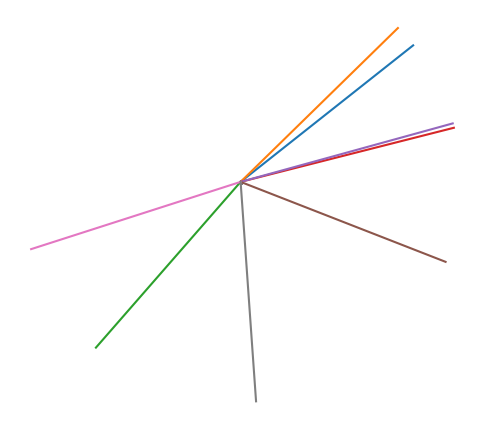

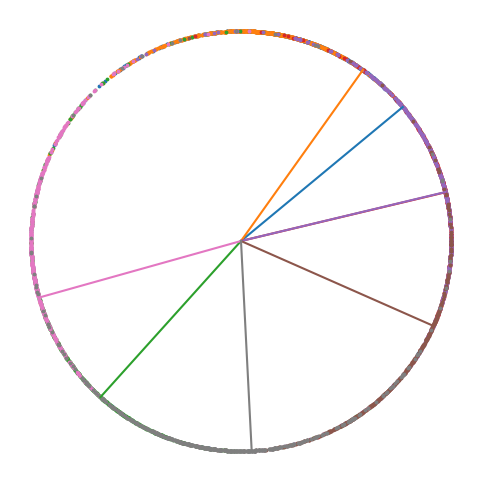

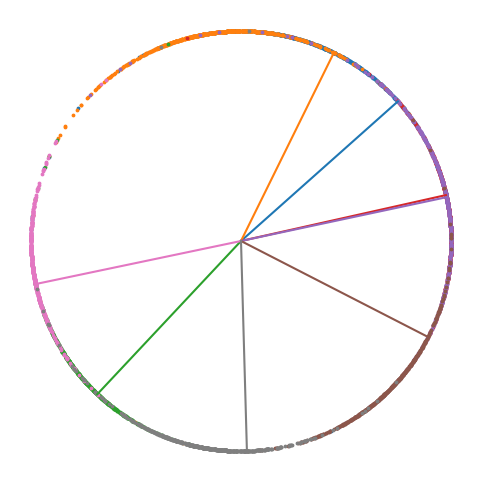

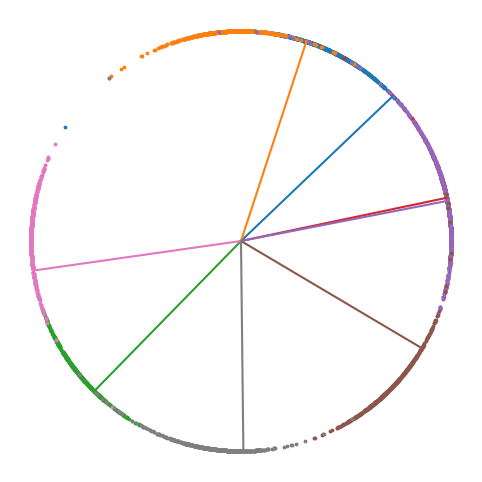

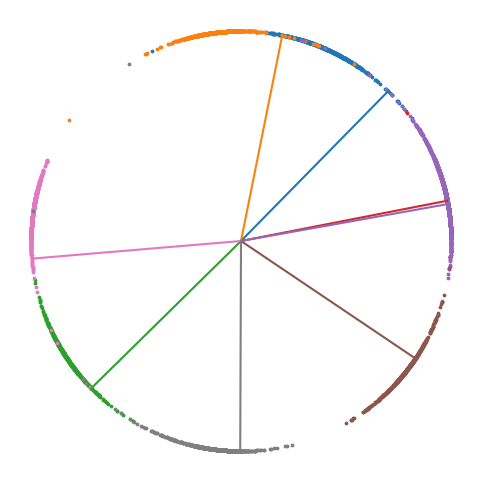

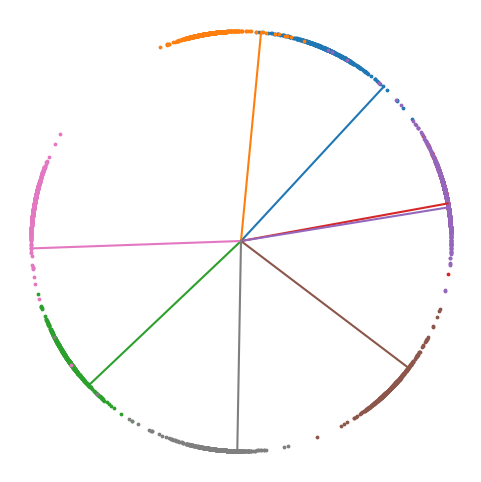

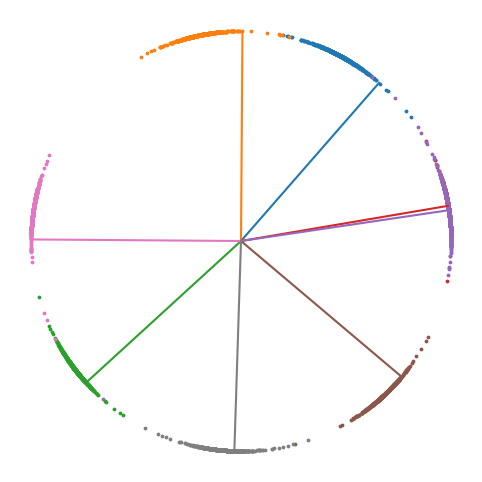

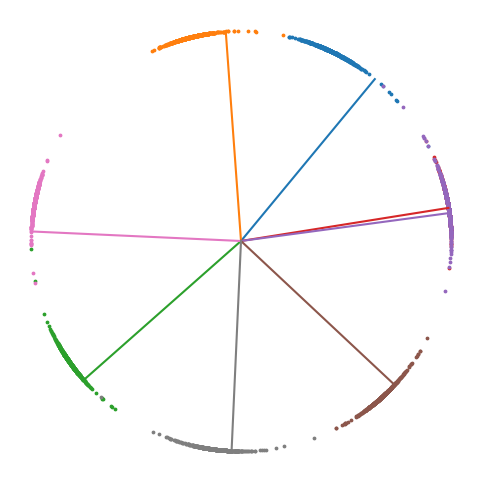

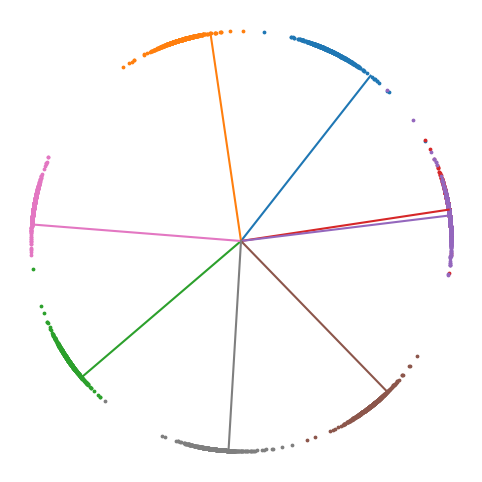

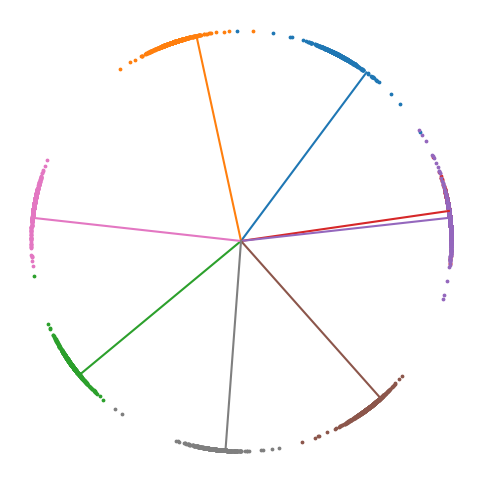

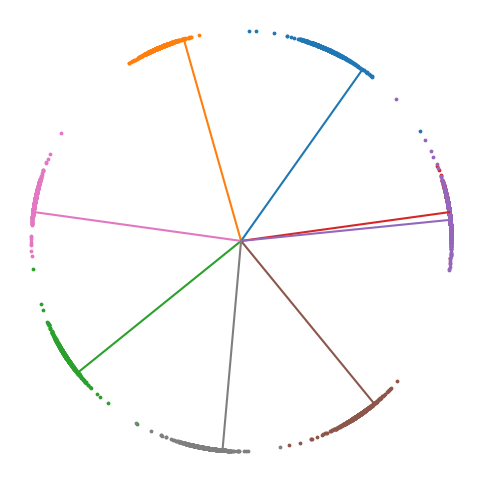

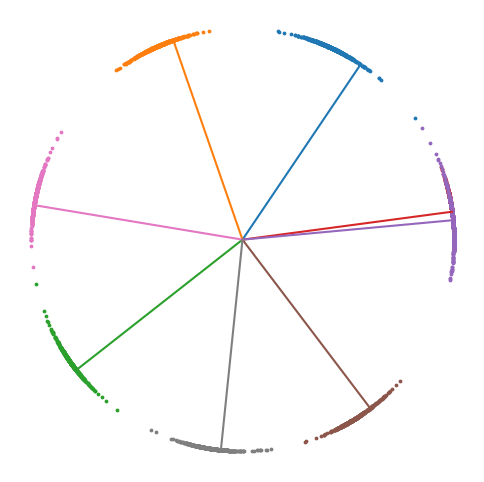

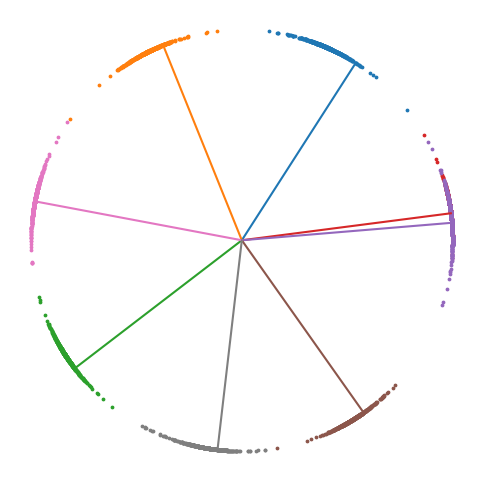

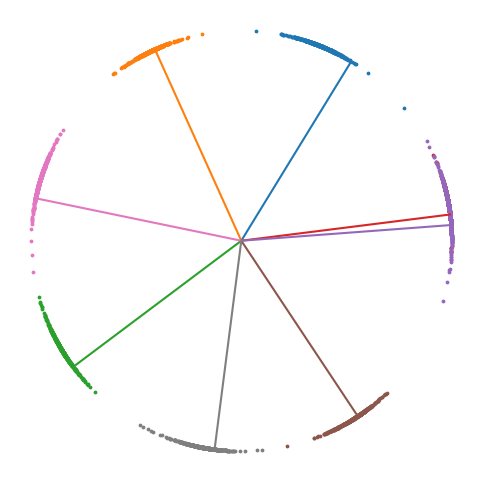

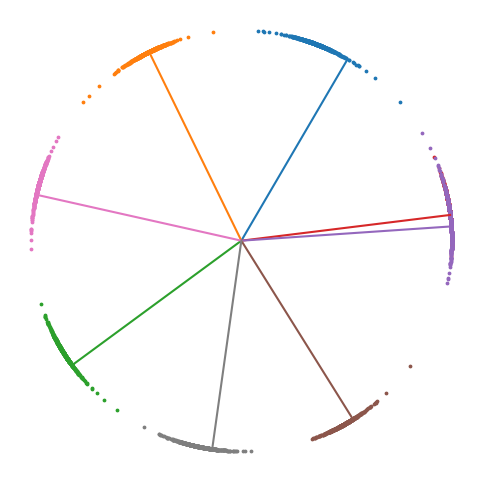

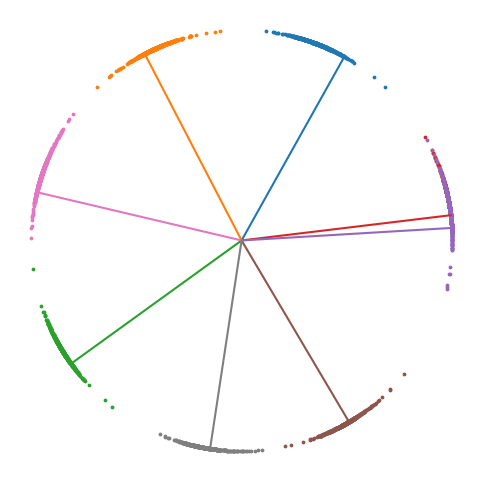

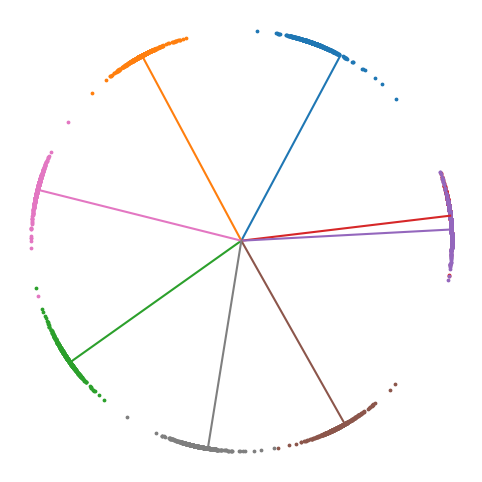

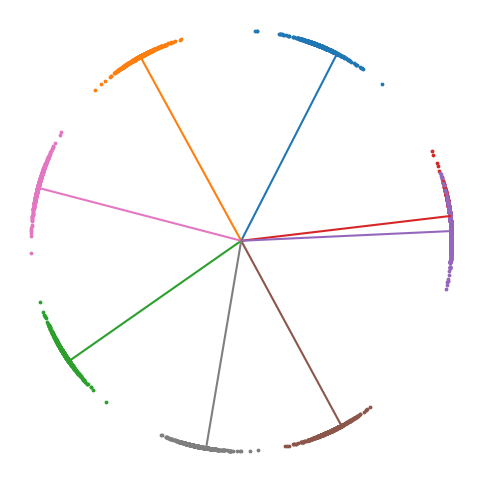

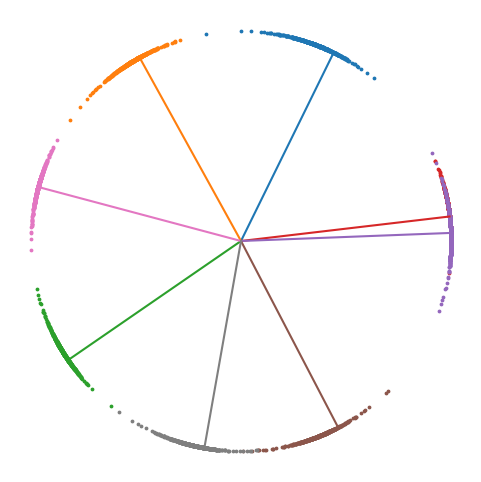

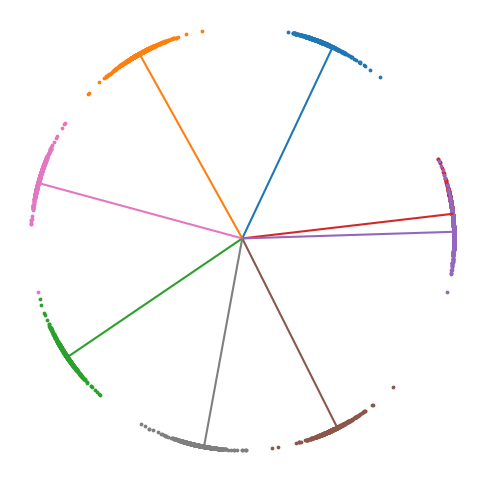

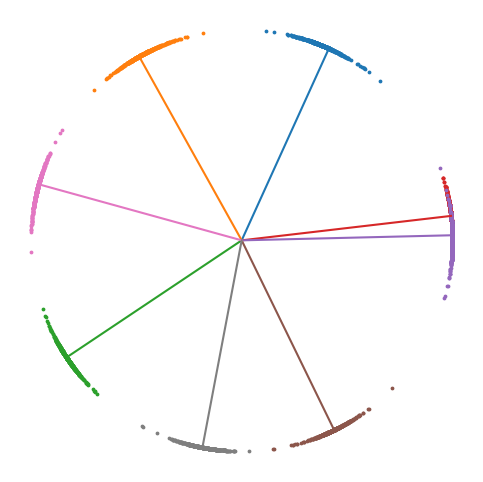

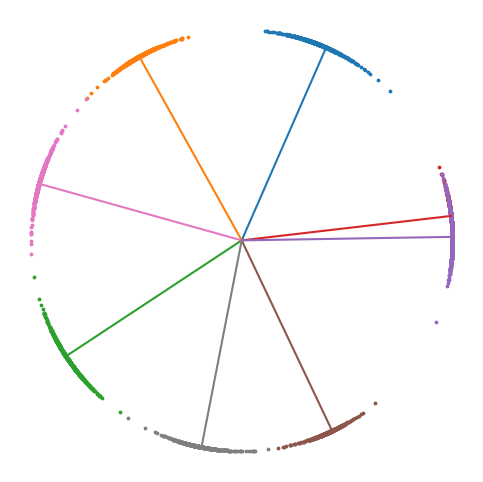

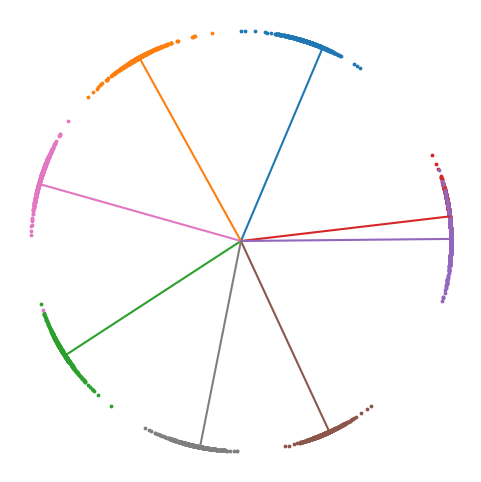

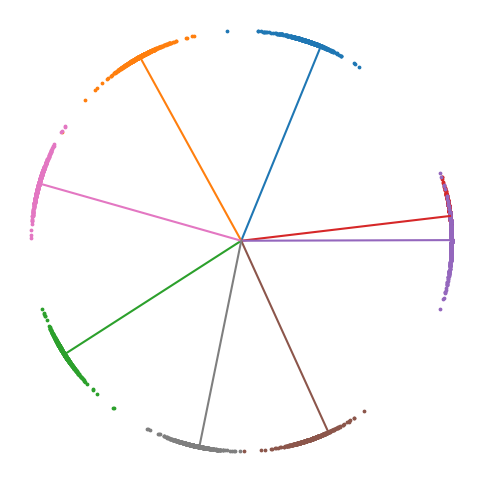

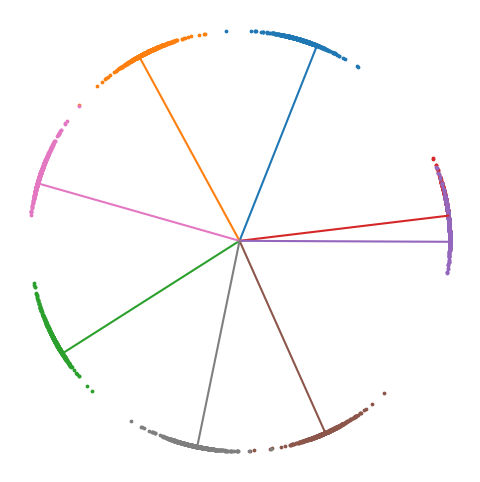

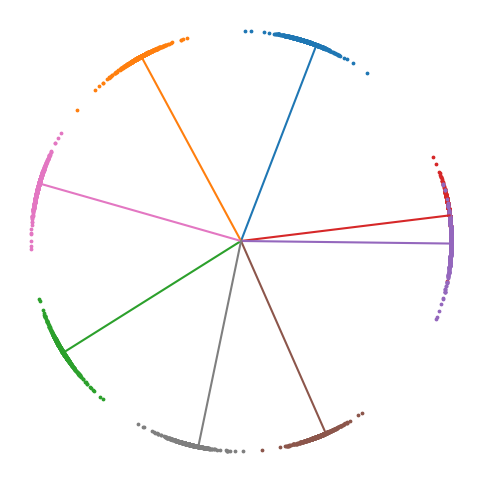

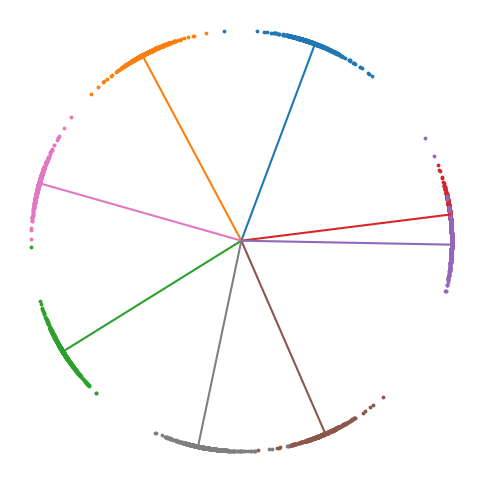

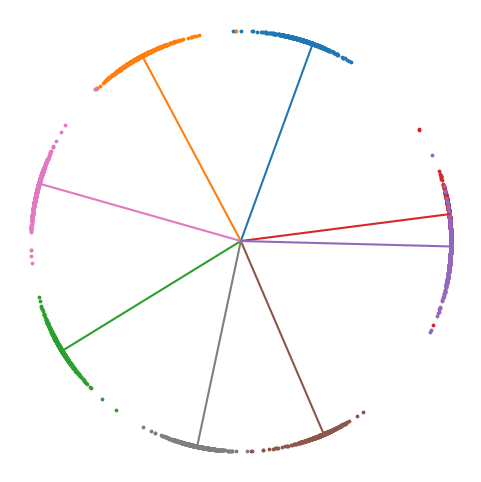

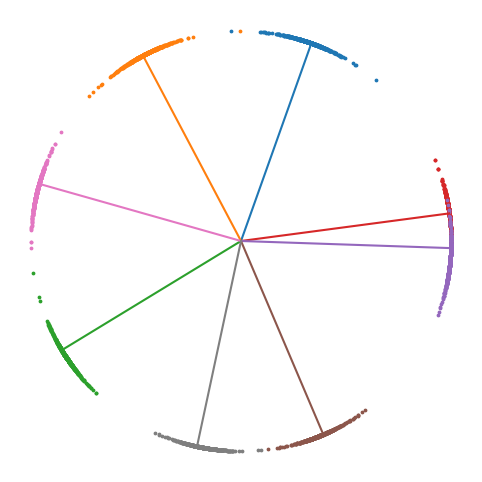

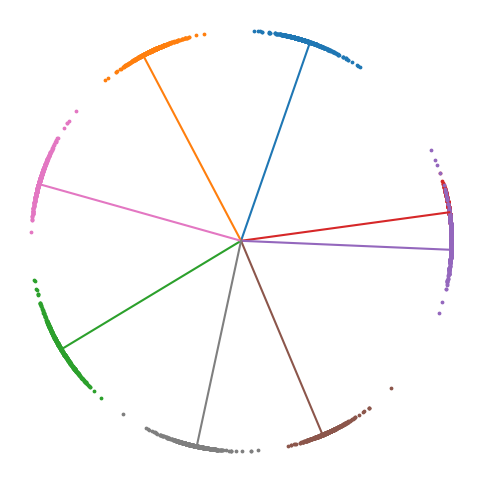

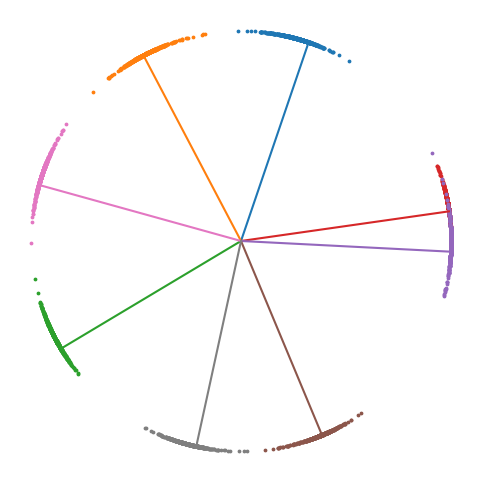

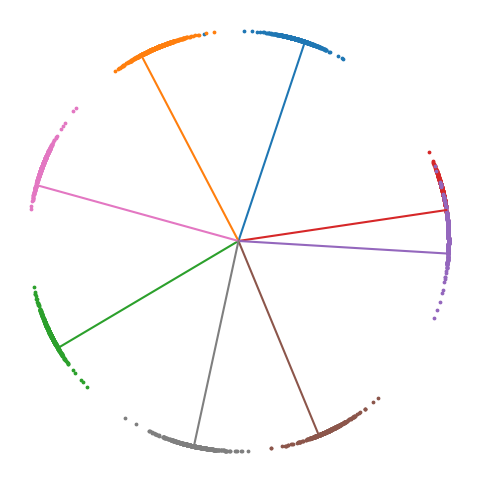

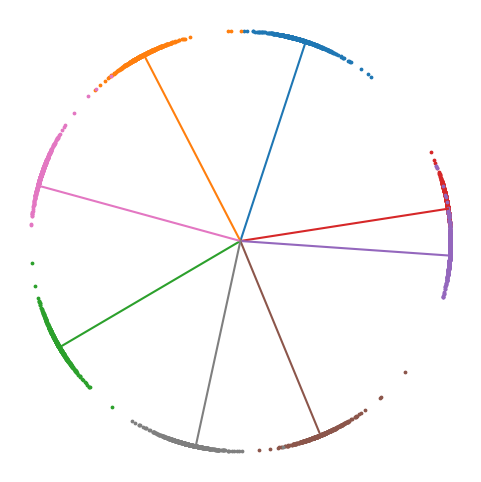

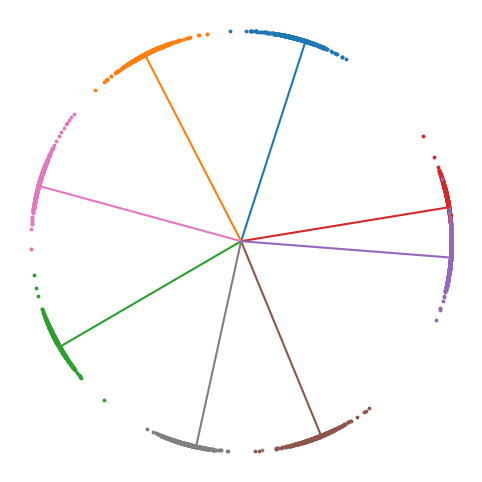

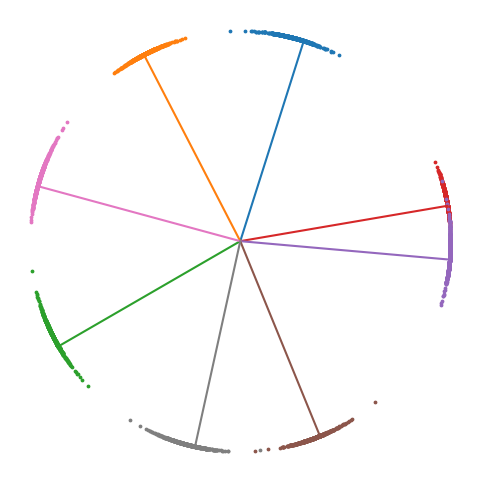

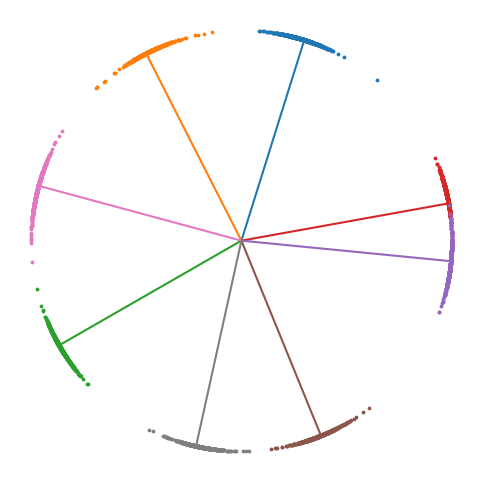

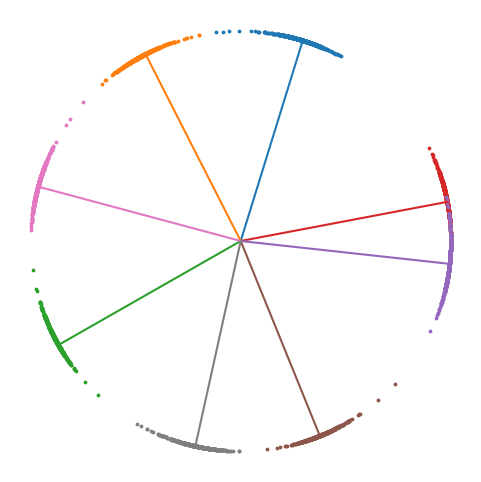

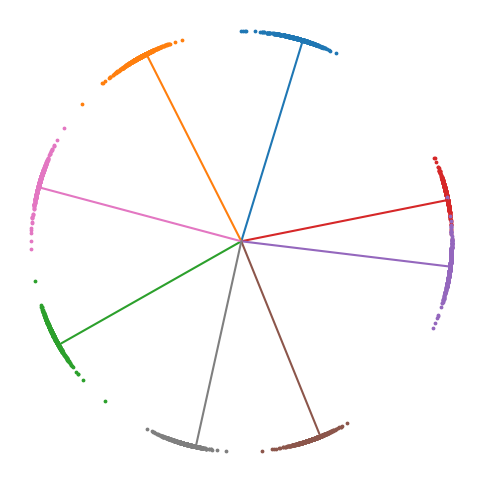

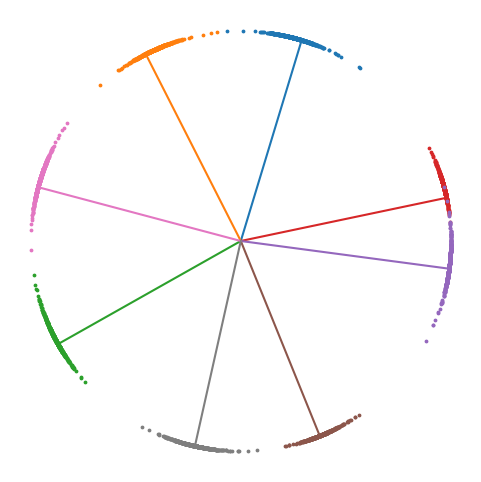

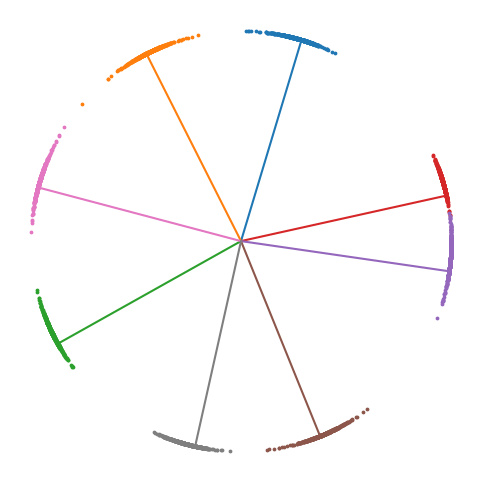

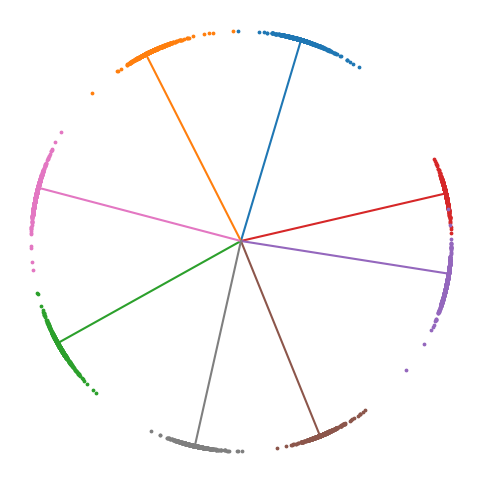

In [7]:
MAX_EPOCHS = 200

# use your own Comet parameters (need to register on https://www.comet.com) or disable the logger
# you can get api_key in the Quickstart guide section on the website
comet_logger = CometLogger(
    api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
    project_name="ArcFace",
    workspace="stalex2902",
    experiment_name="SoftMax default",
    display_summary_level=0,
)

checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="checkpoints/softmax/",
    filename="{epoch:02d}-{val_loss:.2f}",
)

# initialize trainer, use one GPU for training
trainer = Trainer(
    max_epochs=MAX_EPOCHS,
    default_root_dir="outputs/softmax_train",
    accelerator="gpu",
    devices=[1],
    benchmark=True,
    check_val_every_n_epoch=5,
    logger=comet_logger,
    callbacks=[checkpoint_callback],
)

# fit the model
trainer.fit(softmax_model);

### Получение представлений

Ниже приведена функция для получения представлений изображений из ```test_dataloader```.

In [7]:
def predict_features(
    model: pl.LightningModule, test_dataloader: DataLoader, device: str = "cuda"
) -> Tuple[np.array, np.array]:
    """Transform images and get their embeddings.

    :param model: trained MetricLearningModel
    :param test_dataloader: DataLoader with images to be transformed
    :param device: 'gpu' or 'cuda', if available
    :return a tuple of:
        - numpy array with obtained features
        - true image labels (people id's)
    """
    model.to(device)

    # switch model to 'eval' mode: disable randomness, dropout, etc.
    model.eval()

    predicted_features = []
    image_labels = []

    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images = images.to(device)
            features, _ = model(images)
            features = features.detach().cpu().numpy()
            labels = labels.numpy()
            predicted_features.append(features)
            image_labels.append(labels)

    predicted_features = np.concatenate(predicted_features)
    image_labels = np.concatenate(image_labels)

    return predicted_features, image_labels


def compute_distance_and_visualize(
    predicted_features: np.array,
    image_labels: np.array,
    softmax_weights: np.array,
    num_features: int = 2,
) -> List[float]:
    """Compute average distance between embeddings and class centers and visualize 2D results.

    :param predicted_features - model embeddings
    :param image_labels - true image labels
    :param softmax_weights - weights of the classes
    :return - List of average distances for classes
    """
    assert num_features in [
        2,
        3,
    ], f"Cannot visualize feature space with num features = {num_features}."
    assert num_features == len(
        predicted_features[0]
    ), "Desired num_features is not equal to the actual one."

    num_people = len(np.unique(image_labels))
    dists = []
    colors = list(mcolors.TABLEAU_COLORS)[:num_people]

    if num_features == 2:
        plt.figure(figsize=(6, 6))
        for i, (center, color) in enumerate(zip(softmax_weights, colors)):
            points = predicted_features[image_labels == i]

            dists.append(((points - center) ** 2).sum(axis=1).mean().item())

            x, y = [0, center[0]], [0, center[1]]
            plt.plot(x, y, marker="", c=color)
            plt.scatter(points[:, 0], points[:, 1], color=color, s=3)
            if i == (num_people - 1):
                break
        plt.title("Feature space visualization", fontsize=14)
        plt.gca().set_aspect("equal")
        plt.axis("off")
        plt.show()

    else:
        fig = plt.figure(figsize=(6, 6))
        ax = plt.axes(projection="3d")

        u, v = np.mgrid[0 : 2 * np.pi : 50j, 0 : np.pi : 50j]
        x = np.cos(u) * np.sin(v)
        y = np.sin(u) * np.sin(v)
        z = np.cos(v)

        ax.plot_wireframe(x, y, z, color="gray", alpha=0.2, rstride=2, cstride=2)

        for i, (center, color) in enumerate(zip(softmax_weights, colors)):
            points = predicted_features[image_labels == i]

            dists.append(((points - center) ** 2).sum(axis=1).mean().item())

            x, y, z = [0, center[0]], [0, center[1]], [0, center[2]]
            ax.plot3D(x, y, z, marker="", c=color)
            ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], color=color, s=3)
            if i == (num_people - 1):
                break
        plt.title("Feature space visualization", fontsize=14)
        plt.gca().set_aspect("equal")
        plt.axis("off")
        plt.show()

    return dists

100%|███████████████████████████████████████████| 34/34 [00:05<00:00,  6.34it/s]


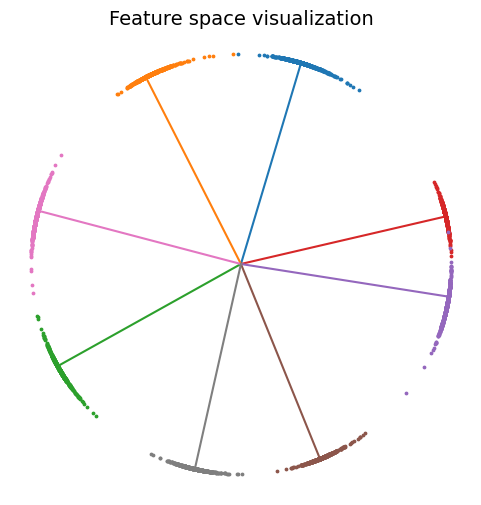

Average distance: 0.004911459080176428


In [24]:
predicted_features, image_labels = predict_features(
    softmax_model, softmax_model.val_dataloader()
)

softmax_weights = softmax_model.softmax_weights.detach().cpu()
softmax_weights = F.normalize(softmax_weights, dim=1).numpy()

dists = compute_distance_and_visualize(
    predicted_features, image_labels, softmax_weights, num_features=NUM_FEATURES
)

print(f"Average distance: {np.mean(dists)}")

## Реализация ArcFace Loss

### Вариант 1: используем ```torch.nn.CrossEntropyLoss()```

In [8]:
EPS = 1e-6


class ArcFaceLoss(torch.nn.Module):
    def __init__(self, s: float = 5, m: float = 0.4) -> None:
        """Initialize ArcFaceLoss.

        :params s, m - scale and margin, respectively
        """
        super(ArcFaceLoss, self).__init__()

        self.s = s
        self.m = m

    def forward(
        self, cosine_logits: torch.Tensor, labels: torch.Tensor
    ) -> torch.Tensor:
        """Compute loss function value.

        :param cos_logits - normalized outputs of the model (cosine in formulas)
        :param labels - true labels
        :return value of the ArcFace loss function
        """
        # one-hot mask of classes
        one_hot_mask = torch.zeros_like(cosine_logits)
        one_hot_mask.scatter_(1, labels.unsqueeze(dim=-1), 1)
        target_cosine = cosine_logits[one_hot_mask == 1]

        # interpret logits as cos(theta) and get angles theta
        # clamp cosines to avoid division-by-zero errors and NaN loss values
        angle = torch.acos(torch.clamp(target_cosine, -1.0 + EPS, 1.0 - EPS))

        # compute cos(theta + m)
        target_cosine_sum = torch.cos(angle + self.m)

        # compute new logits according to the formulas to use CrossEntropyLoss
        diff = (target_cosine_sum - target_cosine).unsqueeze(dim=1)
        logits = (cosine_logits + (one_hot_mask * diff)) * self.s

        return torch.nn.CrossEntropyLoss()(logits, labels)

### Обучаем и тестируем модель таким же образом

In [37]:
NUM_FEATURES = 2

arcface_backbone_model = iresnet50_normalized(num_features=NUM_FEATURES)
arcface_loss = ArcFaceLoss()

arcface_model = MetricLearningModel(
    arcface_backbone_model,
    arcface_loss,
    num_labels=num_people,
    train_set=train_people_set,
    val_set=test_people_set,
    num_features=NUM_FEATURES,
)

In [38]:
MAX_EPOCHS = 200

comet_logger = CometLogger(
    api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
    project_name="ArcFace",
    workspace="stalex2902",
    experiment_name="ArcFace default",
    display_summary_level=0,
)

checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="checkpoints/arcface",
    filename="{epoch:02d}-{val_loss:.2f}",
)

# initialize trainer, use one GPU for training
trainer = Trainer(
    max_epochs=MAX_EPOCHS,
    default_root_dir="outputs/arcface_train",
    accelerator="gpu",
    devices=[1],
    benchmark=True,
    check_val_every_n_epoch=5,
    logger=comet_logger,
    callbacks=[checkpoint_callback],
)

# fit the model
trainer.fit(arcface_model);

CometLogger will be initialized in online mode
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type        | Params
-----------------------------------------
0 | backbone | IResNetNorm | 30.8 M
1 | loss     | ArcFaceLoss | 0     
-----------------------------------------
30.8 M    Trainable params
2         Non-trainable params
30.8 M    Total params
123.178   Total estimated model params size (MB)
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/data/stepikin/ArcFace/all_works' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if you

COMET WARNING: Unknown offline streaming error: RuntimeError('a Tensor with 37632 elements cannot be converted to Scalar'). Check logs for details.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

COMET ERROR: Error sending parameters batch (online experiment)


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Uploading 1 metrics, params and output messages


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>


100%|███████████████████████████████████████████| 35/35 [00:05<00:00,  6.21it/s]


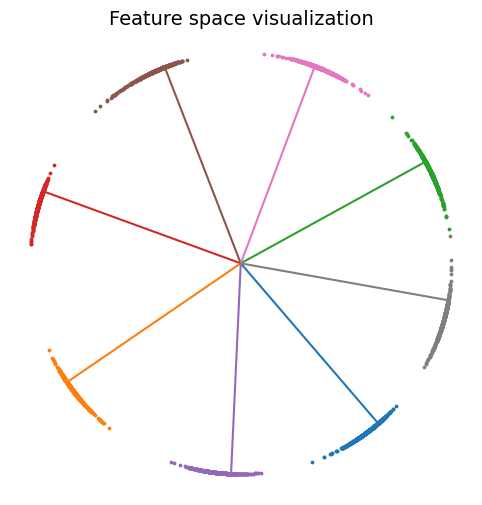

Average distance: 0.00828427862143144


In [41]:
predicted_features, image_labels = predict_features(
    arcface_model, arcface_model.val_dataloader()
)

softmax_weights = arcface_model.softmax_weights.detach().cpu()
softmax_weights = F.normalize(softmax_weights, dim=1).numpy()

dists = compute_distance_and_visualize(
    predicted_features, image_labels, softmax_weights, num_features=NUM_FEATURES
)

print(f"Average distance: {np.mean(dists)}")

Другие использованные варианты:

### Вариант 2: считаем по формуле

```
class MyArcFaceLoss(torch.nn.Module):
    def __init__(self, s: float = 5., m: float = 0.4, num_classes: int = 8):
        super(MyArcFaceLoss, self).__init__()
        
        self.m = torch.tensor(m)
        self.s = torch.tensor(s)
        self.nc = num_classes
        
    def forward(self, logits: torch.Tensot, target: torch.Tensot) -> torch.Tensot:
        logits = logits.clamp(-1. + EPS, 1. - EPS)

        tar_OH = F.one_hot(target, num_classes=self.nc)
        
        logits_true_class = logits[torch.where(tar_OH)]
        logits_other_class = logits[torch.where(tar_OH == 0)].reshape(logits.shape[0], logits.shape[1] - 1)
        exp_other_class = torch.exp(logits_other_class * self.s)
        angle_true_class = torch.arccos(logits_true_class)
        exp_true_class = torch.exp(torch.cos(angle_true_class + self.m) * self.s)

        arc_loss = -torch.log(
            exp_true_class / (torch.sum(exp_other_class, dim=1) + exp_true_class)
        ).mean()
        
        return arc_loss
```

### Вариант 3: используем формулу косинуса суммы

```
class ArcFaceLoss(torch.nn.Module):
    def __init__(self, m: float = 0.4, s: float = 5.):
        super().__init__()
        self.m = m
        self.s = s
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        
    def forward(self, logits, labels):
        eps = 1e-6
        # logits уже нормализованы но исключим случаи, когда значения косинуса слишком близки к 1
        cos_th = torch.clamp(logits, -1 + EPS, 1 - EPS) 
        sin_th = torch.sqrt(1.0 - torch.pow(cos_th, 2))
        
        cos_sum = cos_th * self.cos_m - sin_th * self.sin_m
        
        # $cos(\theta + m)$
        cos_sum = torch.where( # условие для соблюдения монотонности аргументов                               
            cos_th > math.cos(math.pi - self.m),            # если $\theta + m < \pi$
            cos_th * self.cos_m - sin_th * self.sin_m,      # то просто косинус суммы $cos(\theta + m)$ 
            cos_th - self.m * math.sin(math.pi - self.m)    # иначе
        )
        
        # маска, в которой элемент со значением 1 соответсвует logit для класса
        # чтобы отделить элементы, в которых необходимо брать $cos(\theta + m)$
        one_hot = torch.zeros(cos_th.size(), device=labels.device)
        one_hot.scatter_(1, labels.unsqueeze(-1).long(), 1)
        # вычисляем аргументы на вход кросcэнтропии
        output = (cos_sum * one_hot) + (cos_th * (1.0 - one_hot)) 
        # скейлим
        output *= self.s
        return torch.nn.CrossEntropyLoss()(output, labels)
```

Обратите внимание, что в этой реализации используется трюк, связанный с монотонностью. Более подробно об этом написано в старой версии [статьи](https://arxiv.org/pdf/1801.07698v1.pdf) про ArcFace.

### Вариант 4: используем готовый лосс
```
%!pip install pytorch_metric_learning

from pytorch_metric_learning import losses
loss = losses.ArcFaceLoss(num_classes=NUM_PEOPLE, embedding_size=NUM_FEATURES, margin=28.6, scale=64)
```

Здесь нужно обратить внимание на несколько моментов:
1) В эту лосс функцию, в отличие от нашей реализации, нужно передавать обычные эмбеддинги модели размерности ```(batch_size, embedding_size)```, а не нормализованные логиты.
2) Параметр отступа ```margin``` здесь необходимо указывать в градусах, а не в радианах.

В остальном данная реализация должна работать точно так же.

## Перебор гиперпараметров модели

In [11]:
def clean_up():
    torch.cuda.empty_cache()
    gc.collect()


def grid_search_acrface(
    margin_list: List[float],
    scale_list: List[float],
    num_features: int = 2,
    max_epochs: int = 50,
) -> Tuple[pl.LightningModule, Tuple[float]]:
    """Search for best ArcFace model given the parameters grid.

    :param margin_list - list of values for the margin parameter
    :param scale_list - list of values for the scale parameter
    :param num_features - dimensionality of the feature space
    :param max_epochs - number of epochs for training
    """
    best_metric = np.inf
    best_params = (None, None)
    best_model = None

    for m, s in product(margin_list, scale_list):
        print(f"Current parameters: m = {m}, s = {s}")

        # initalize model
        arcface_backbone_model = iresnet50_normalized(num_features=num_features)
        arcface_loss = ArcFaceLoss(m=m, s=s)

        model = MetricLearningModel(
            arcface_backbone_model,
            arcface_loss,
            num_labels=num_people,
            train_set=train_people_set,
            val_set=test_people_set,
            num_features=NUM_FEATURES,
        )

        comet_logger = CometLogger(
            api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
            project_name="ArcFace",
            workspace="stalex2902",
            experiment_name=f"ArcFace default; m = {m}, s = {s}",
            display_summary_level=0,
        )

        checkpoint_callback = ModelCheckpoint(
            monitor="val_loss",
            dirpath="checkpoints/arcface",
            filename="{epoch:02d}-{val_loss:.2f}",
        )

        # train model
        trainer = Trainer(
            max_epochs=max_epochs,
            default_root_dir="outputs/arcface_train",
            accelerator="gpu",
            devices=[1],
            benchmark=True,
            check_val_every_n_epoch=5,
            logger=comet_logger,
            callbacks=[checkpoint_callback],
        )
        trainer.fit(model)

        # evaluate metric and visualize results
        predicted_features, image_labels = predict_features(
            model, model.val_dataloader()
        )

        softmax_weights = model.softmax_weights.detach().cpu()
        softmax_weights = F.normalize(softmax_weights, dim=1).numpy()

        dists = compute_distance_and_visualize(
            predicted_features, image_labels, softmax_weights, num_features=num_features
        )
        metric = np.mean(dists)

        print(f"Average distance: {metric}")

        if metric < best_metric:
            best_metric = metric
            best_params = (m, s)
            best_model = model

        print("#" * 50)

        clean_up()
        del model
        del predicted_features

    return best_model, best_params

In [12]:
margin_list = [0.10, 0.25, 0.50, 1.00]
scale_list = [1, 2, 5, 10, 50]

best_model, (best_m, best_s) = grid_search_acrface(
    margin_list, scale_list, max_epochs=100
)

print(f"Best params are: m = {best_m}, s = {best_s}")

Current parameters: m = 0.1, s = 1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

KeyboardInterrupt



## 3D модели

Обучим SoftMax модель с ```num_features = 3``` 100 эпох.

In [55]:
NUM_FEATURES = 3
MAX_EPOCHS = 100

softmax_backbone_model_3d = iresnet50_normalized(num_features=NUM_FEATURES)
softmax_loss = torch.nn.CrossEntropyLoss()

softmax_model_3d = MetricLearningModel(
    softmax_backbone_model_3d,
    softmax_loss,
    num_labels=num_people,
    train_set=train_people_set,
    val_set=test_people_set,
    num_features=NUM_FEATURES,
)

comet_logger = CometLogger(
    api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
    project_name="ArcFace",
    workspace="stalex2902",
    experiment_name="SoftMax 3D",
    display_summary_level=0,
)

checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="checkpoints/softmax_3D",
    filename="{epoch:02d}-{val_loss:.2f}",
)

# initialize trainer, use one GPU for training
trainer = Trainer(
    max_epochs=MAX_EPOCHS,
    default_root_dir="outputs/softmax_train",
    accelerator="gpu",
    devices=[1],
    benchmark=True,
    check_val_every_n_epoch=5,
    logger=comet_logger,
    callbacks=[checkpoint_callback],
)

# fit the model
trainer.fit(softmax_model_3d);

CometLogger will be initialized in online mode
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type             | Params
----------------------------------------------
0 | backbone | IResNetNorm      | 30.8 M
1 | loss     | CrossEntropyLoss | 0     
----------------------------------------------
30.8 M    Trainable params
3         Non-trainable params
30.8 M    Total params
123.278   Total estimated model params size (MB)
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/data/stepikin/ArcFace/all_works' nor in any parent directory. Set `CO

COMET WARNING: Unknown offline streaming error: RuntimeError('a Tensor with 37632 elements cannot be converted to Scalar'). Check logs for details.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

COMET ERROR: Error sending parameters batch (online experiment)


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Uploading 1 metrics, params and output messages


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>


100%|███████████████████████████████████████████| 35/35 [00:05<00:00,  6.21it/s]


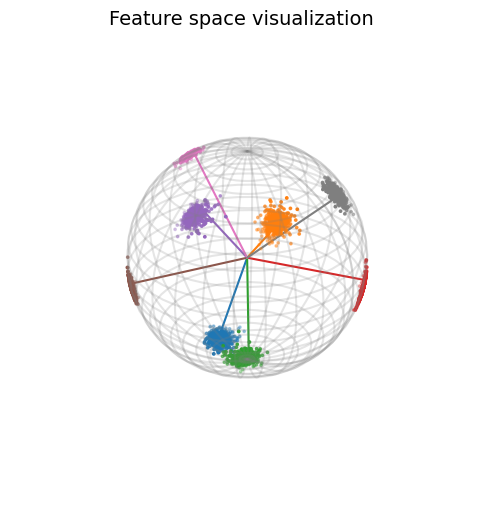

Average distance: 0.008968216367065907


In [65]:
predicted_features, image_labels = predict_features(
    softmax_model_3d, softmax_model_3d.val_dataloader()
)

softmax_weights = softmax_model_3d.softmax_weights.detach().cpu()
softmax_weights = F.normalize(softmax_weights, dim=1).numpy()

dists = compute_distance_and_visualize(
    predicted_features, image_labels, softmax_weights, num_features=NUM_FEATURES
)

print(f"Average distance: {np.mean(dists)}")

## Triplet Loss

Здесь приведено модифицированное решение Сергея Десятова.


Для обучения модели с помощью triplet loss'а нам понадобится другой датасет и немного другой модуль для модели. Более подробно об этом лоссе вы можете почитать в [статье](https://arxiv.org/abs/1503.03832).

Основная идея этого контрастивного подхода состоит в следующем. На этапе обучения из датасета формируются тройки объектов (картинок) $(x^{a}, x^{p}, x^{n})$ таким образом, чтобы $x^{a}$ и $x^{p}$ принадлежади одному классу, а $x^{a}$ и $x^{n}$ - разным. Затем модель $f$ обучается с помощью следующей функции потерь:

$$L = \sum_{i}{max\left(0, {\left(\|f(x_{i}^{a}) - f(x_{i}^{p})\|_{2}^{2} - \|f(x_{i}^{a}) - f(x_{i}^{n})\|_{2}^{2} + \alpha\right)}\right)},$$

который "сближает" представления пар картинок, принаджащих одному классу, и "отдаляет" представления пар картинок, принадлежащих разным классам. Близость представлений подразумевается по 2-метрике.

In [4]:
class TripletDataset(Dataset):
    """Triplet dataset wrapper."""

    def __init__(self, root_dir: str, num_labels: int, test: bool = False) -> None:
        """Initialize ArcFace Dataset.

        :param root_dir: path to the folder containing face images
        :param num_labels: number of classes (people) to be used
        :param test: if True, create test dataset (no augmentations, no labels)
        """
        super().__init__()

        self.test = test

        # for test dataset, use default transformations (conver to torch.Tensor and normalize),
        # do not use augmentations
        if self.test:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        # for train dataset, add augmentations of images (Random horizontal flip)
        else:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        self.root_dir = root_dir
        path_imgrec = os.path.join(root_dir, "train.rec")
        path_imgidx = os.path.join(root_dir, "train.idx")

        # load pictures
        self.imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, "r")
        s = self.imgrec.read_idx(0)
        header, _ = mx.recordio.unpack(s)

        self.imgidx = np.array(range(1, int(header.label[0])))

        # load or create labels
        labels_path = Path(root_dir) / "labels.npy"
        if labels_path.is_file():
            self.labels = np.load(labels_path)
        else:
            print("Listing labels...")
            labels = []
            for i in tqdm(range(len(self.imgidx))):
                idx = self.imgidx[i]
                s = self.imgrec.read_idx(idx)
                header, img = mx.recordio.unpack(s)
                label = header.label
                labels.append(int(label))
            self.labels = np.array(labels)
            # save labels
            np.save(labels_path, self.labels)

        unique_labels, unique_counts = np.unique(self.labels, return_counts=True)
        top_ids = np.argsort(unique_counts)[::-1][:num_labels]
        self.top_labels = unique_labels[top_ids]

        self.label_map = dict(
            zip(self.top_labels.tolist(), np.arange(len(self.top_labels)))
        )

        # store final images and labels
        final_images = []
        final_labels = []
        m = len(self.imgidx)

        for idx in tqdm(self.imgidx):
            # idx = self.imgidx[i]
            s = self.imgrec.read_idx(idx)
            header, img = mx.recordio.unpack(s)
            label = header.label
            ln = label
            if not isinstance(label, numbers.Number):
                label = label[0]
            label = self.label_map.get(int(label), 10)
            sample = mx.image.imdecode(img).asnumpy()

            if label < num_labels:
                final_images.append(sample)
                final_labels.append(label)

        self.images = np.array(final_images)
        self.labels = np.array(final_labels)
        self.index = np.array([i for i in range(len(self.images))])

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, Optional[int]]:
        """Get item of a dataset.

        :param index: index of an item
        :return:
            - a tuple (image, label) for the train dataset
            - image for tht test dataset
        """
        anchor_img = self.images[index]
        anchor_label = self.labels[index]

        if self.test:
            if self.transform is not None:
                anchor_img = self.transform(anchor_img)
            return anchor_img, torch.tensor(anchor_label, dtype=torch.long)
        else:
            positive_list = self.index[self.index != index][
                self.labels[self.index != index] == anchor_label
            ]
            positive_item = random.choice(positive_list)
            positive_img = self.images[positive_item]

            negative_list = self.index[self.index != index][
                self.labels[self.index != index] != anchor_label
            ]
            negative_item = random.choice(negative_list)
            negative_img = self.images[negative_item]
            if self.transform is not None:
                anchor_img = self.transform(anchor_img)
                positive_img = self.transform(positive_img)
                negative_img = self.transform(negative_img)
            return (
                anchor_img,
                positive_img,
                negative_img,
                torch.tensor(anchor_label, dtype=torch.long),
            )

    def __len__(self) -> int:
        """Return size of the dataset."""
        return len(self.index)

In [5]:
NUM_PEOPLE = 8

path_to_data = "ms1m_subset"

train_triplet_dataset = TripletDataset(path_to_data, num_labels=NUM_PEOPLE, test=False)
test_triplet_dataset = TripletDataset(path_to_data, num_labels=NUM_PEOPLE, test=True)

100%|███████████████████████████████████| 44705/44705 [00:12<00:00, 3718.89it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


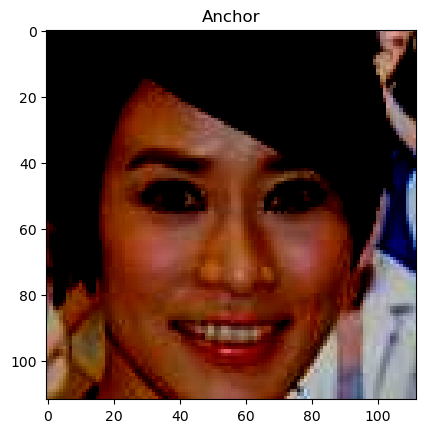

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


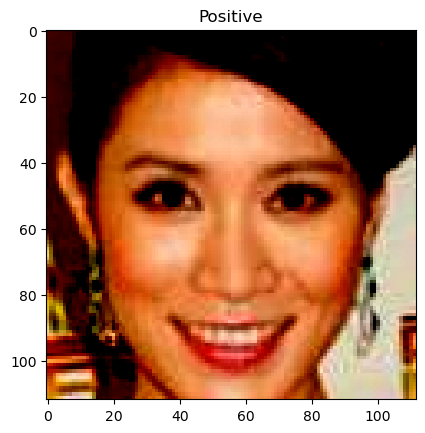

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


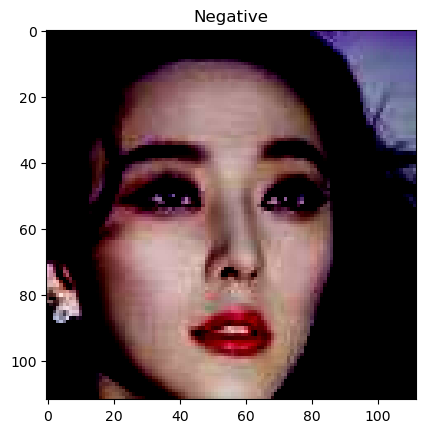

In [109]:
# check triplets
anch, pos, neg, label = train_triplet_dataset[0]

plt.imshow(anch.transpose(0, 2).transpose(0, 1))
plt.title("Anchor")
plt.show()

plt.imshow(pos.transpose(0, 2).transpose(0, 1))
plt.title("Positive")
plt.show()

plt.imshow(neg.transpose(0, 2).transpose(0, 1))
plt.title("Negative")
plt.show()

In [6]:
class TripletLoss(torch.nn.Module):
    def __init__(self, alpha: float = 1.0) -> None:
        """Initialize TripletLoss.

        :param alpha - margin parameter
        """
        super(TripletLoss, self).__init__()

        self.alpha = alpha

    def _calc_euclidean(self, x1: torch.Tensor, x2: torch.Tensor) -> torch.Tensor:
        """Compute eucledean distance between 2 points x1 and x2."""
        return (x1 - x2).pow(2).sum(1)

    def forward(
        self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor
    ) -> torch.Tensor:
        """Do forward pass through the model.

        :param anchor - batch of anchor images
        :param positive - batch of positive images
        :param negative - batch of negative images
        """
        # compute loss according to formulas
        distance_positive = self._calc_euclidean(anchor, positive)
        distance_negative = self._calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.alpha)
        return losses.mean()

In [7]:
class TripletMetricLearningModel(MetricLearningModel):
    """Lightning wrapper for a Metric Learning model."""

    def __init__(
        self,
        backbone: torch.nn.Module,
        loss: torch.nn.Module,
        num_labels: int,
        train_set: Dataset,
        val_set: Dataset,
        num_features: int = 2,
        batch_size: int = 128,
        learning_rate: float = 1e-4,
        weight_decay: float = 5e-5,
        num_workers: int = 2,
    ) -> None:
        """Initialize TripletMetricLearningModel.

        :param backbone: core deef model to be trained
        :param loss: loss function to be used
        :param num_labels: number of target classes (people)
        :param train_set - dataset with training data
        :param val_set - dataset with test data
        :param num_features - dimensionality of the feature space
        :param batch_size, learning_rate, weight_decay - model training parameters
        :param num_workers - number of CPUs to be used (for dataloaders)
        """
        # everything is in MetricLearningModel except for training and validation steps
        super().__init__(
            backbone,
            loss,
            num_labels,
            train_set,
            val_set,
            num_features,
            batch_size,
            learning_rate,
            weight_decay,
            num_workers,
        )

    def training_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor, torch.Tensor], idx: int
    ) -> Dict[str, torch.Tensor]:
        """Do a training step of the model.

        :param batch: batch of input images and labels
        :param idx: batch number
        :return: value of the loss function
        """
        anc_images, pos_images, neg_images, labels = batch
        anc_features, _ = self(anc_images)
        poc_features, _ = self(pos_images)
        neg_features, _ = self(neg_images)

        loss = self.loss(anc_features, poc_features, neg_features)

        # log loss value
        self.log("train_loss", loss.item(), prog_bar=True)

        return {"loss": loss, "out": anc_features, "label": labels}

    def validation_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], idx: int
    ) -> Dict[str, torch.Tensor]:
        """Do a validation step of the model.

        :param batch: batch of input images and labels
        :param idx: batch number
        :return: value of the loss function
        """
        anc_images, labels = batch
        anc_features, _ = self(anc_images)

        return {"out": anc_features, "label": labels}

    def validation_epoch_end(self, outputs: List[Dict[str, torch.Tensor]]) -> None:
        """Compute metrics and log figures at every validation epoch.

        :param outputs - List validation_step() outputs (List of dicts in our case)
        """
        # aggreaget predicted features and labels; need to use CPU for matplotlib
        features = (
            torch.vstack([batch_out["out"] for batch_out in outputs]).detach().cpu()
        )
        labels = torch.hstack([batch_out["label"] for batch_out in outputs]).cpu()

        colors = list(mcolors.TABLEAU_COLORS)[: self.hparams.num_labels]
        dists = []

        if self.hparams.num_features == 2:
            plt.figure(figsize=(6, 6))

            for i, color in zip(np.unique(labels), colors):
                points = features[labels == i]
                center = torch.mean(points, dim=0).repeat(len(points), 1)
                dists.append(((points - center) ** 2).sum(axis=1).mean().item())
                plt.scatter(points[:, 0], points[:, 1], color=color, s=3, alpha=0.35)
                plt.scatter(center[0][0], center[0][1], color="k", s=15)

            plt.gca().set_aspect("equal")
            plt.axis("off")
            plt.title("2D feature space visualization", fontsize=14)

        else:
            for i, color in zip(np.unique(labels), colors):
                points = features[labels == i]
                center = torch.mean(points, dim=0).repeat(len(points), 1)
                dists.append(((points - center) ** 2).sum(axis=1).mean().item())

        # log matplotlib.figure() and the metrics to Logger
        # figure logging works only with several loggers (e.g. comet)
        if self.hparams.num_features == 2:
            self.logger.experiment.log_figure(
                f"val_picture_num_{self.current_epoch}", plt
            )
            plt.clf()

        self.log("val_avg_distance", np.mean(dists), prog_bar=True)

In [8]:
NUM_FEATURES = 2
MAX_EPOCHS = 100
BATCH_SIZE = 32

triplet_backbone_model = iresnet50(num_features=NUM_FEATURES)
triplet_loss = TripletLoss()

triplet_model = TripletMetricLearningModel(
    triplet_backbone_model,
    triplet_loss,
    num_labels=NUM_PEOPLE,
    train_set=train_triplet_dataset,
    val_set=test_triplet_dataset,
    num_features=NUM_FEATURES,
    batch_size=BATCH_SIZE,
)

comet_logger = CometLogger(
    api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
    project_name="ArcFace",
    workspace="stalex2902",
    experiment_name="Triplet",
    display_summary_level=0,
)

checkpoint_callback = ModelCheckpoint(
    monitor="train_loss",
    dirpath="checkpoints/triplet/",
    filename="{epoch:02d}-{train_loss:.2f}",
)

# initialize trainer, use one GPU for training
trainer = Trainer(
    max_epochs=MAX_EPOCHS,
    default_root_dir="outputs/triplet_train",
    accelerator="gpu",
    devices=[1],
    benchmark=True,
    check_val_every_n_epoch=2,
    logger=comet_logger,
    callbacks=[checkpoint_callback],
)

# fit the model
trainer.fit(triplet_model);

CometLogger will be initialized in online mode
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type        | Params
-----------------------------------------
0 | backbone | IResNet     | 30.8 M
1 | loss     | TripletLoss | 0     
-----------------------------------------
30.8 M    Trainable params
2         Non-trainable params
30.8 M    Total params
123.178   Total estimated model params size (MB)
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: You are trying to log string value as a metric. This is not recommended.
COMET INFO: Couldn't find a Git repository in '/mnt/data/s

COMET WARNING: Unknown offline streaming error: RuntimeError('a Tensor with 37632 elements cannot be converted to Scalar'). Check logs for details.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

COMET ERROR: Error sending parameters batch (online experiment)


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Please wait for metadata to finish uploading (timeout is 3600 seconds)


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>